In [73]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
from scipy.signal import welch

import h5py

In [74]:
%matplotlib notebook

## Global functions

In [75]:
def getdata(fname, gain_error=1.0):

    f = h5py.File(fname,'r')
    pos_data = np.array(f['pos_data'])
    quad_data = np.array(f['quad_data'])
    
    ## special comment for Alex:
    ## fsamp is the sampling frequency
    ## in here I read it from the file
    global fsamp
    fsamp = f.attrs['Fsamp']
    fsamp /= f.attrs['downsamp']
    
    ## reshape and extract xyz data
    ## assuming the data contains the correct amount of samples ordered in a correct way
    ## in the reprocessor a testing prcedure has to be implemented 
    ## pos_data contains:
    ## [x_lf_2, y_lf_2, x_lf, y_lf, z_lf, sync, x_fb, y_fb, z_fb, time1, time2]
    pos_xyz = pos_data.reshape(-1,11).T
    quad_data = quad_data.reshape(-1,13).T
    
    return pos_xyz, quad_data

## Sync FPGA and AO 

In [76]:
fname = r'/data/new_trap/Testdata/20190606/10Hz_squareTrigger_sawtoothAM_TestDigital2.h5'
pos, quad = getdata(fname)
fname = r'/data/new_trap/Testdata/20190606/10Hz_squareTrigger_sawtoothAM_TestDigital_downsamp10.h5'
pos10, quad10 = getdata(fname)

In [77]:
sum(quad[12]), sum(quad10[12]), quad10.shape
sum(quad10[4]==10)

24988

<IPython.core.display.Javascript object>


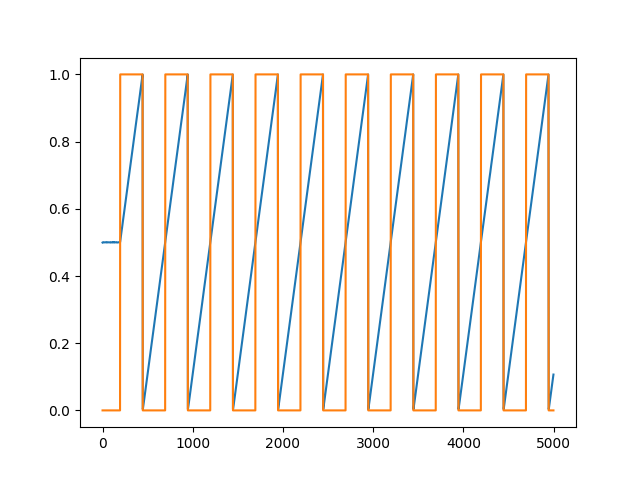

In [79]:
_,ax = plt.subplots()
_ = [ax.plot(range(5000), qq/np.max(qq)) for qq in [quad[1],quad[12]]]
# _ = [ax[1].plot(range(5000), qq/np.max(qq)) for qq in [pos[1],pos[5]]]

<IPython.core.display.Javascript object>


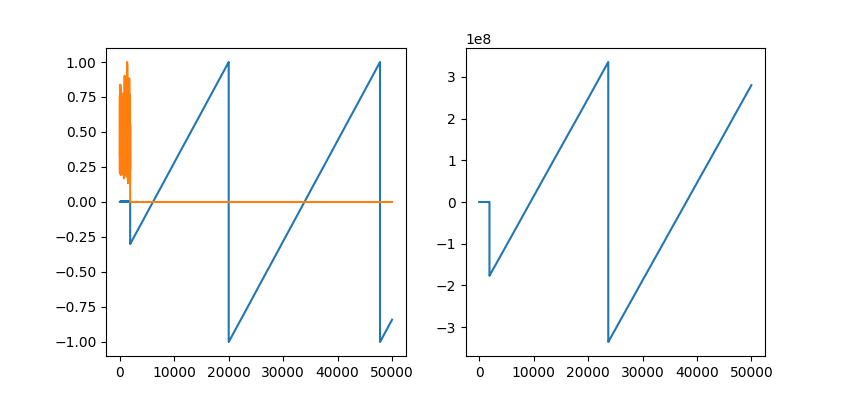

In [90]:
_,ax = plt.subplots(1,2,figsize=(8.5,4))
i = 4
_ = [ax[0].plot(range(50000), qq/np.max(qq)) for qq in [quad10[0],quad10[i]]]
ax[1].plot(range(50000),quad10[12])
# _ = [ax[1].plot(range(5000), qq/np.max(qq)) for qq in [pos10[1],pos10[5]]]

## Other

In [4]:
fname = r'/data/new_trap/20190607/50000samples_3.7mbar_FeedbackOff_8dbm.h5'
pos, quad = getdata(fname)

<IPython.core.display.Javascript object>


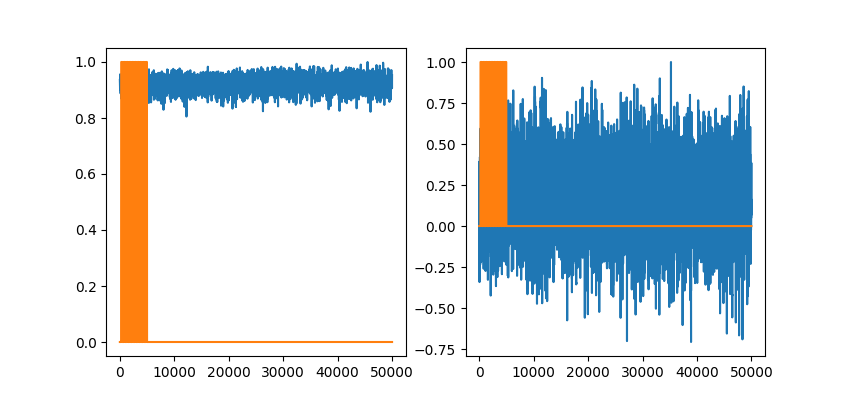

In [5]:
_,ax = plt.subplots(1,2,figsize=(8.5,4))
_ = [ax[0].plot(range(50000), qq/np.max(qq)) for qq in [quad[1],quad[12]]]
_ = [ax[1].plot(range(50000), qq/np.max(qq)) for qq in [pos[1],pos[5]]]

In [71]:
res = 2**12
data_det=signal.detrend(pos)
ypsd, freqs = matplotlib.mlab.psd(data_det[4], Fs = fsamp, NFFT = res)
ypsd_w, freqs_w = welch(data_det[4], fs = fsamp, nfft = res)

In [27]:
x = data_det[4] 
fft = np.abs(np.fft.rfft(x))**2
fft = np.sqrt(fft)
freqs2 = np.fft.rfftfreq(len(x), d=1./5000)

<IPython.core.display.Javascript object>


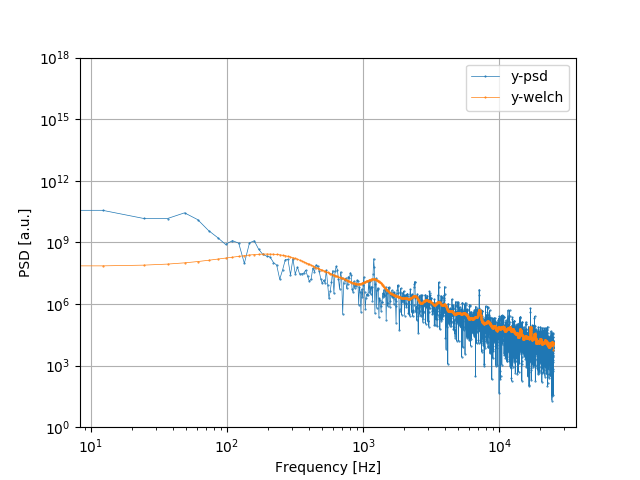

In [72]:
_,ax = plt.subplots()
ax.loglog(freqs, ypsd, '.-', label="y-psd",markersize=1,linewidth=0.5)
ax.loglog(ypsd_w, freqs_w, '.-', label="y-welch",markersize=1,linewidth=0.5)
# ax.loglog(freqs2, fft, '.-', label="y-fft",markersize=1,linewidth=0.5)
ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
plt.xlim(None,None)
plt.ylim(1,1e18)
plt.grid(True)